# Stocks investments

> Comparing 2 Stocks file strategy 'Buy and Hold' and 'Arima' models 

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp arima_stats

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
barak = [1,2,3]
diker = [3,4,5]
barak + diker

[1, 2, 3, 3, 4, 5]

In [ ]:
#| export 

#import torch
import pandas as pd
import numpy as np
import pmdarima as pm
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
#| export
def foo(name): 
    return "Hello HAHAHAH" + name

In [ ]:
#| export
def say_hello(to):
    "Say hello to somebody"
    return f'Hello {to}!'

In [ ]:
#| export 


def create_arima_prediction(series):
    auto_arima = pm.auto_arima(series, stepwise=False, seasonal=False)

In [ ]:
#| hide

series_data = yf.download('LUMI.TA', start='2021-12-10', end='2022-12-30')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#| hide
#auto_arima = pm.auto_arima(data['High'].to_numpy())
series_data.index[0]
pd.Series(pd.date_range(series_data.index[0], freq="B", periods=30)) # "1/1/2011"
series_data.index

DatetimeIndex(['2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-19', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23',
               ...
               '2022-12-18', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-25', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29'],
              dtype='datetime64[ns]', name='Date', length=259, freq=None)

In [ ]:
#| hide
barak = pd.Series([None,None])
print(barak.isna().sum())

2


In [ ]:
#| export 




def create_auto_arima_prediction(series_data, prediction_depth=30):
    """
    Given pandas series return a series with the same indexes (Dates)
    """
    df = pd.DataFrame()
    df['High'] = series_data
    df.index = np.arange(len(df))

    msk = (df.index < len(df)-prediction_depth)
    df_train = df[msk].copy()
    df_test = df[~msk].copy()

    df_train = df_train['High']
    df_test = df_test['High']
    
    #print(df_train.isna().sum())
    
    # Doesn't work very well , Trying to Autocreate the arima parameters
    #auto_arima = pm.auto_arima(df_train.to_numpy())
    
    auto_arima = pm.auto_arima(df_train.to_numpy(), start_p=1, start_q=1, d=0, max_p=5, max_q=5,
                      out_of_sample_size=10, suppress_warnings=False,
                      stepwise=True, error_action='ignore')
    
    forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
  
    
    auto_pred = pd.Series([None]*len(df_train) + list(forecast_test_auto))
    auto_pred.index = series_data.index
    print(auto_arima)
    #df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

    #from statsmodels.tsa.arima.model import ARIMA
    #model = ARIMA(df_train, order=(2,1,3))
    #model_fit = model.fit()
    #forecast_test = model_fit.forecast(len(df_test))
    #df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
    #return df['forecast_auto']
    return auto_pred


In [ ]:
#| export 

def create_auto_arima_prediction_future_2(series_data,future=40):
    temp_series = pd.Series(series_data)
    temp_series=pd.concat([temp_series,pd.Series([None]*future , index=pd.date_range(series_data.index[-1], freq='D', periods=future))])
    auto_pred = create_auto_arima_prediction(temp_series,future)
    return auto_pred

In [ ]:
#| export 

def create_dataframe_with_series(func , series_data):
    pred_series = func(series_data)
    df = pd.DataFrame()
    df['pred'] = pred_series
    df['High'] = series_data
    return df

/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/s

 ARIMA(1,0,1)(0,0,0)[0] intercept


/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

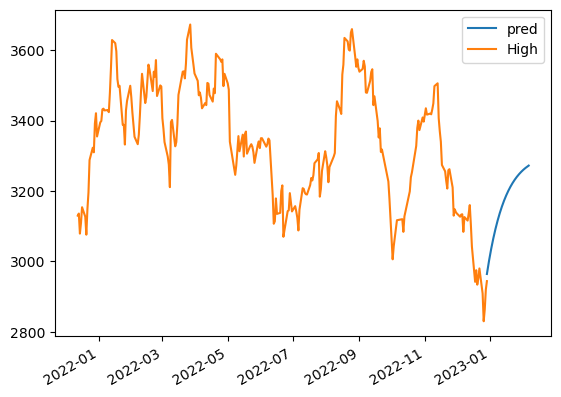

In [ ]:
#| hide
df = create_dataframe_with_series(create_auto_arima_prediction_future_2 , series_data['High'])
df.plot()


In [ ]:

nan_rows = df.isna().any(axis=1).sum()
print(nan_rows)
print(len(df))
df


298
299


,pred,High
2021-12-12,NaN,3130.0
2021-12-13,NaN,3136.0
2021-12-14,NaN,3079.0
2021-12-15,NaN,3109.0
2021-12-16,NaN,3154.0
...,...,...
2023-02-02,3262.932251,NaN
2023-02-03,3265.456878,NaN
2023-02-04,3267.838453,NaN
2023-02-05,3270.085082,NaN


/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/s

 ARIMA(1,0,1)(0,0,0)[0] intercept


/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: >

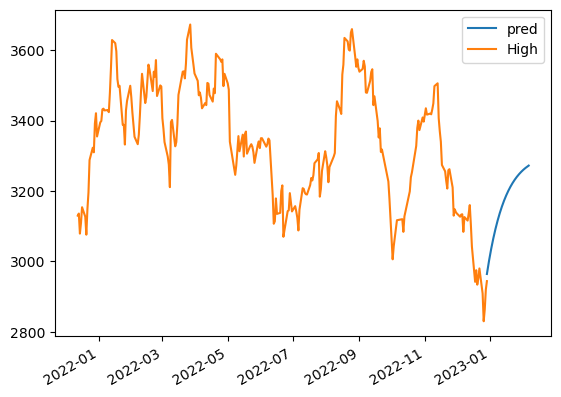

In [ ]:
#| hide
pred_series = create_auto_arima_prediction_future_2(series_data['High'])
df = pd.DataFrame()
df['pred'] = pred_series
df['High'] = series_data['High']
#pred_series.index = df.index

df.plot()

/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/s

 ARIMA(1,0,1)(0,0,0)[0] intercept


/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/barakdiker/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Date'>

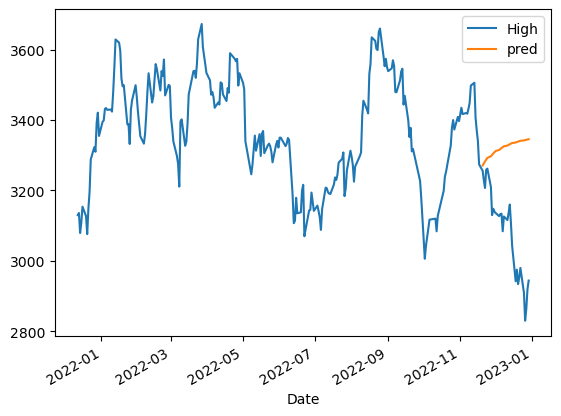

In [ ]:
#| hide
pred_series = create_auto_arima_prediction(series_data['High'])
df = pd.DataFrame()
df['High'] = series_data['High']
#pred_series.index = df.index
df['pred'] = pred_series
df.plot()

## Sample on how to create auto-arima model 

<Axes: >

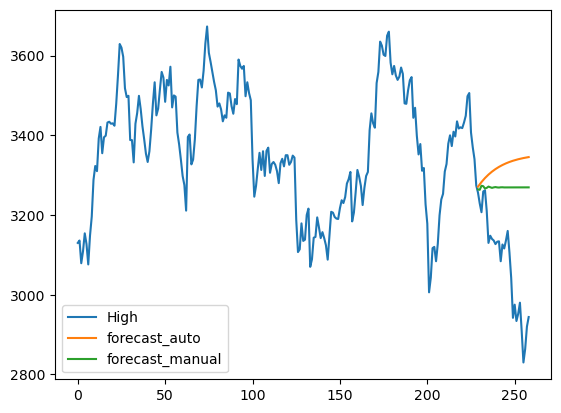

In [ ]:
#| hide

df = pd.DataFrame()
df['High'] = series_data['High']
df.index = np.arange(len(df))

msk = (df.index < len(df)-30)
df_train = df[msk].copy()
df_test = df[~msk].copy()

df_train = df_train['High']
df_test = df_test['High']

# Doesn't work very well , Trying to Autocreate the arima parameters
auto_arima = pm.auto_arima(df_train.to_numpy())
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

model = ARIMA(df_train, order=(2,1,3))
model_fit = model.fit()
forecast_test = model_fit.forecast(len(df_test))
df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)


#df.plot(['High','forecast_auto'])
df.plot()


In [ ]:
# after one differencing the data is stationary 
#df_train_diff = df_train.diff().dropna()
#df_train_diff.plot()

In [ ]:
#from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#acf_diff = plot_acf(df_train_diff)

#pacf_diff = plot_pacf(df_train_diff)

In [ ]:
#| hide
#import nbdev; nbdev.nbdev_export()

In [ ]:
#| hide
print("barak")

barak


In [ ]:
from fastcore.test import *
from IPython.display import display,SVG

In [ ]:

test_eq(say_hello("Hamel"), "Hello Hamel!")

In [ ]:

display(SVG('<svg height="100" xmlns="http://www.w3.org/2000/svg"><circle cx="50" cy="50" r="40"/></svg>'))

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()